# Bharat Intern Task 1

## Stock Price Prediction

pandas: Used for data manipulation and handling.

numpy: Essential for numerical operations and data handling.

matplotlib.pyplot: Used for plotting graphs.

MinMaxScaler: This is used to scale (normalize) the stock prices to values between 0 and 1 to help the neural network converge faster.

Sequential: A Keras model for building a sequential neural network.

LSTM and Dense: Layers for building the LSTM neural network.

In [178]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings("ignore")


In [179]:

import yfinance as yf

aapl = yf.Ticker('AAPL')
df = aapl.history(period='5y')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-19 00:00:00-04:00,52.316207,52.584372,51.550021,52.285080,108495200,0.0,0.0
2018-09-20 00:00:00-04:00,52.732820,53.221262,52.471834,52.682537,106435200,0.0,0.0
2018-09-21 00:00:00-04:00,52.862113,53.000985,52.026489,52.115082,384986800,0.0,0.0
2018-09-24 00:00:00-04:00,51.913955,52.977036,51.868462,52.864502,110773600,0.0,0.0
2018-09-25 00:00:00-04:00,52.615500,53.350563,52.603528,53.199718,98217600,0.0,0.0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2018-09-19 00:00:00-04:00 to 2023-09-18 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1257 non-null   float64
 1   High          1257 non-null   float64
 2   Low           1257 non-null   float64
 3   Close         1257 non-null   float64
 4   Volume        1257 non-null   int64  
 5   Dividends     1257 non-null   float64
 6   Stock Splits  1257 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


In [181]:
#checking for the null values
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [182]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-12 00:00:00-04:00,179.490005,180.130005,174.820007,176.300003,90370200,0.0,0.0
2023-09-13 00:00:00-04:00,176.509995,177.300003,173.979996,174.210007,84267900,0.0,0.0
2023-09-14 00:00:00-04:00,174.000000,176.100006,173.580002,175.740005,60895800,0.0,0.0
2023-09-15 00:00:00-04:00,176.479996,176.500000,173.820007,175.009995,109205100,0.0,0.0
2023-09-18 00:00:00-04:00,176.479996,179.380005,176.169998,177.970001,67117100,0.0,0.0


In [183]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-19 00:00:00-04:00,52.316207,52.584372,51.550021,52.285080,108495200,0.0,0.0
2018-09-20 00:00:00-04:00,52.732820,53.221262,52.471834,52.682537,106435200,0.0,0.0
2018-09-21 00:00:00-04:00,52.862113,53.000985,52.026489,52.115082,384986800,0.0,0.0
2018-09-24 00:00:00-04:00,51.913955,52.977036,51.868462,52.864502,110773600,0.0,0.0
2018-09-25 00:00:00-04:00,52.615500,53.350563,52.603528,53.199718,98217600,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-12 00:00:00-04:00,179.490005,180.130005,174.820007,176.300003,90370200,0.0,0.0
2023-09-13 00:00:00-04:00,176.509995,177.300003,173.979996,174.210007,84267900,0.0,0.0
2023-09-14 00:00:00-04:00,174.000000,176.100006,173.580002,175.740005,60895800,0.0,0.0


In [184]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

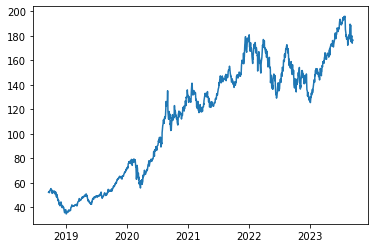

In [185]:
df.shape
plt.plot(df['Open']);

In [186]:
# Create sequences for LSTM
sequence_length = 10  # Adjust this window size as needed
X = []
y = []

for i in range(len(df) - sequence_length):
    X.append(df['Close'].values[i:i+sequence_length])
    y.append(df['Close'].values[i+sequence_length])

X = np.array(X)
y = np.array(y)

In [187]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [188]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [189]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
32/32 [==============================] - 11s 22ms/step - loss: 0.0320
Epoch 2/20
32/32 [==============================] - 1s 19ms/step - loss: 0.0019
Epoch 3/20
32/32 [==============================] - 1s 18ms/step - loss: 7.7426e-04
Epoch 4/20
32/32 [==============================] - 1s 17ms/step - loss: 7.5737e-04
Epoch 5/20
32/32 [==============================] - 1s 16ms/step - loss: 7.5951e-04
Epoch 6/20
32/32 [==============================] - 1s 20ms/step - loss: 7.1946e-04
Epoch 7/20
32/32 [==============================] - 1s 20ms/step - loss: 7.2357e-04
Epoch 8/20
32/32 [==============================] - 1s 19ms/step - loss: 7.1071e-04
Epoch 9/20
32/32 [==============================] - 1s 19ms/step - loss: 7.7006e-04
Epoch 10/20
32/32 [==============================] - 1s 19ms/step - loss: 6.9770e-04
Epoch 11/20
32/32 [==============================] - 1s 19ms/step - loss: 7.0073e-04
Epoch 12/20
32/32 [==============================] - 1s 17ms/step - loss: 7.1628e

In [190]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss: {train_loss}")
print(f"Testing Loss: {test_loss}")

Training Loss: 0.000938342185690999
Testing Loss: 0.001297623966820538


In [191]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to get actual prices
predictions = scaler.inverse_transform(predictions)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)


8/8 [==============================] - 2s 9ms/step


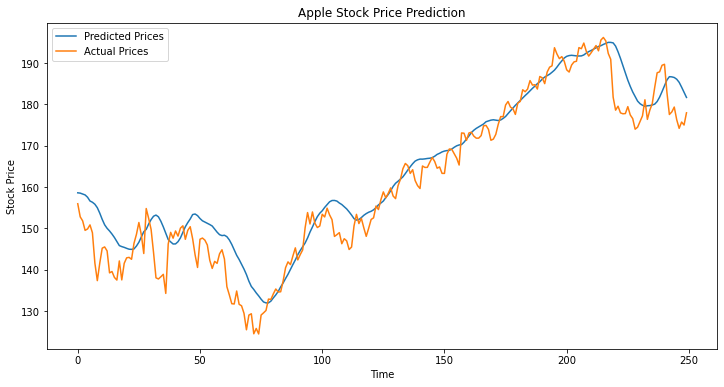

In [192]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted Prices')
plt.plot(y_test, label='Actual Prices')
plt.legend()
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()
